In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hasinroses/Dataset_all/main/insurance_data.csv')
df

,age,affordability,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [3]:
df.shape

(13, 3)

In [4]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/hasinroses/ImageCollection/main/Simple%20Neural%20Network.png')

# Set weight=1 and Bias=0¶

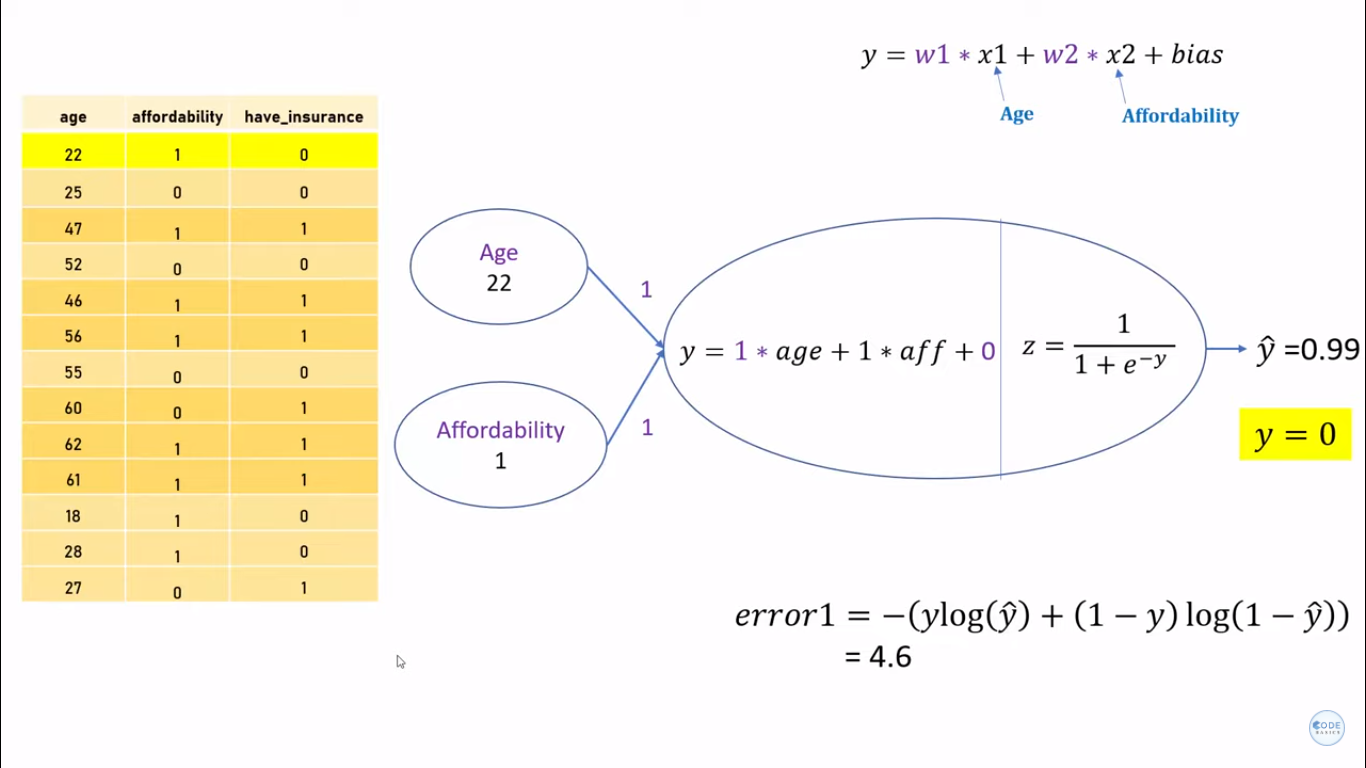

In [5]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/hasinroses/ImageCollection/main/Set%20weight.png')

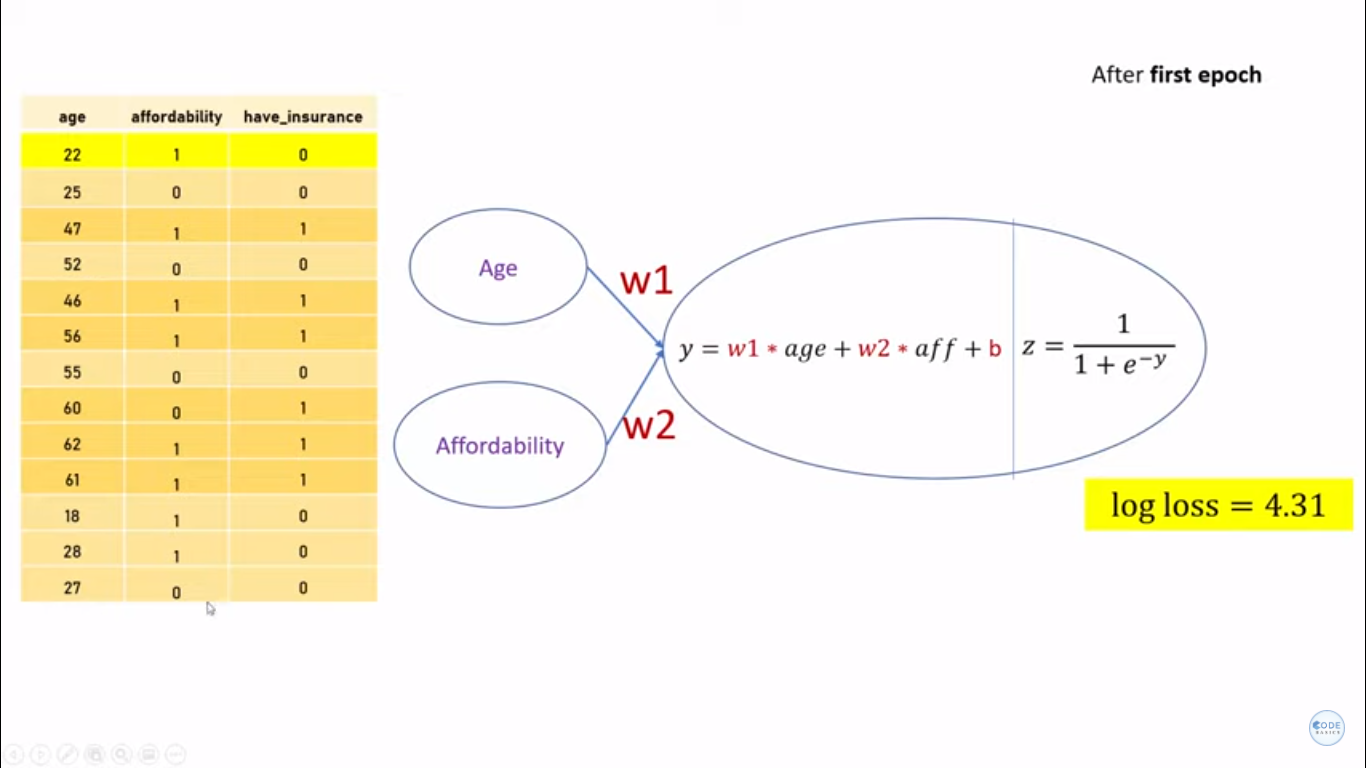

In [6]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/hasinroses/ImageCollection/main/after%20first%20Epoch.png')

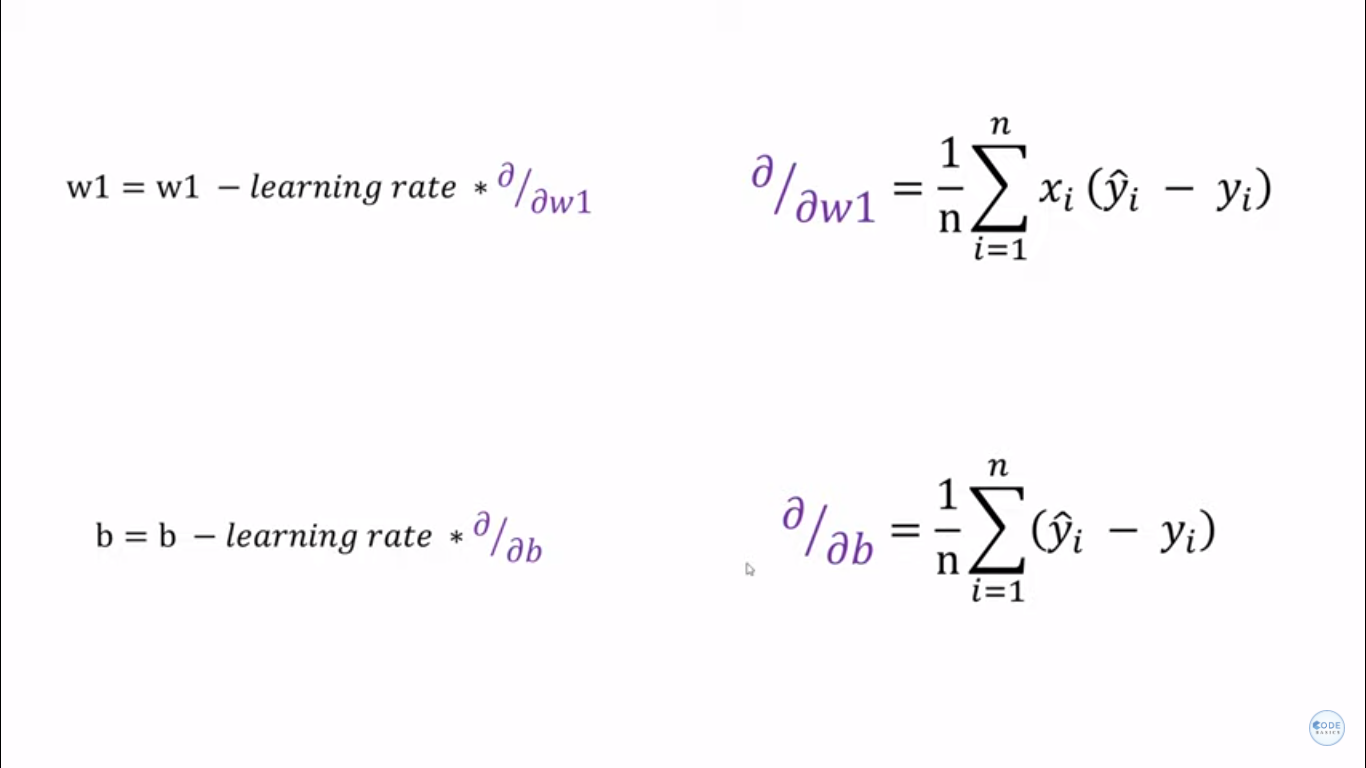

In [7]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/hasinroses/ImageCollection/main/derivativesof.png')

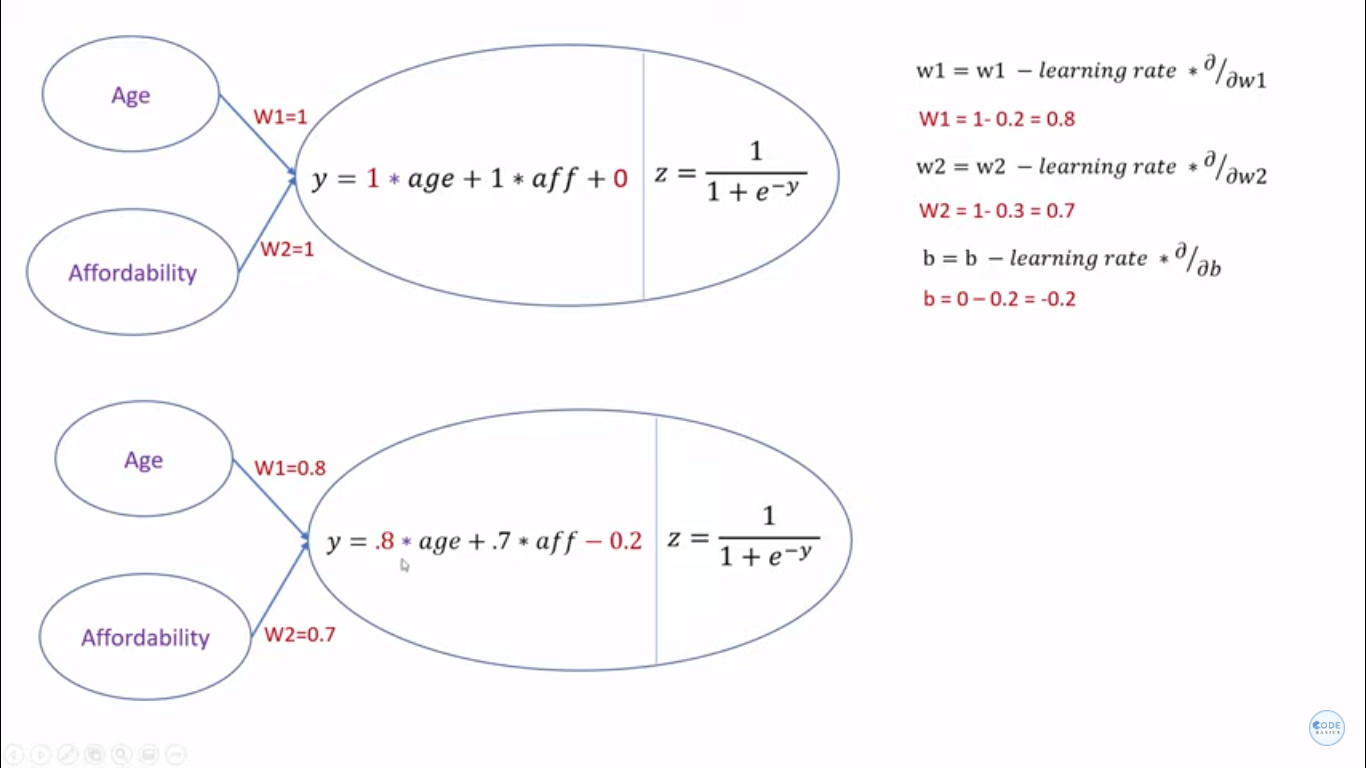

In [8]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/hasinroses/ImageCollection/main/weightupdate.png')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age','affordability']],df.bought_insurance,test_size=0.2,random_state=25)

In [10]:
len(X_train)

10

In [11]:
len(X_test)

3

In [12]:
X_train_scaled=X_train.copy()
X_train_scaled['age']=X_train_scaled['age']/100

X_test_scaled=X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100

In [13]:
X_test_scaled

,age,affordability
11,0.28,1
8,0.62,1
3,0.52,0


In [14]:
X_train_scaled['age']

1     0.25
9     0.61
12    0.27
0     0.22
5     0.56
2     0.47
7     0.60
6     0.55
10    0.18
4     0.46
Name: age, dtype: float64

In [15]:
y_train

1     0
9     1
12    0
0     0
5     1
2     1
7     1
6     0
10    0
4     1
Name: bought_insurance, dtype: int64

# Implementing Neural Network by using Python

# Step1: creating Activation Function

In [16]:
def sigmoid_num(x):
    return (1/(1+np.exp(-x)))
    
#sigmoid_num(np.array([12,0,1]))

In [17]:
1/(1+np.exp(-1.1214))

0.7542483097239633

In [18]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/hasinroses/ImageCollection/main/21.png')

# Step 2: Implementing Log Loss Functions

In [19]:
def log_loss(y_true,y_predicted):
    epsilon=1e-15
    y_predicted_new=[max(i,epsilon) for i in y_predicted]
    y_predicted_new=[min(i,1-epsilon) for i in y_predicted]
    y_predicted_new=np.array(y_predicted_new)
    return np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

# Step 3: Implementing Model Class 

In [20]:
class myLogisticModel:
    def __init__(self):
        self.w1=1
        self.w2=1
        self.bias=0
    
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias=self.gradient_descent(X['age'],X['affordability'],y,epochs,loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
    
    def predict(self, X_test):
        #print(X_test_scaled)
        weighted_sum=self.w1*X_test['age'] + self.w2*X_test['affordability'] + self.bias
        #return sigmoid_num(weighted_sum)
        output_value=sigmoid_num(weighted_sum)
        return output_value
        #return [output_value if output_value>0.70 else 0]
   
    def gradient_descent(self,age,affordability,y_true,epochs,loss_thresold):
        w1=w2=1
        bias=0
        rate=0.5
        n=len(age)
        for i in range(epochs):
            weighted_sum=w1 * age + w2 * affordability + bias
            y_predicted=sigmoid_num(weighted_sum)
            loss=log_loss(y_true,y_predicted)
        
            w1d=(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w2d=(1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
            
            bias_d=np.mean(y_predicted-y_true)
        
            w1=w1-rate*w1d
            w2=w2-rate*w2d
            bias=bias-rate*bias_d
        
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break
    
        return w1,w2,bias
        

# My Model Fit

In [21]:
myModel=myLogisticModel()
myModel.fit(X_train_scaled, y_train,epochs=5000, loss_thresold=0.4631)

Epoch:0, w1:0.9818023510435051, w2:0.9589316923292891, bias:-0.11152137282510333, loss:-0.6821533000097723
Epoch:0, w1:0.9818023510435051, w2:0.9589316923292891, bias:-0.11152137282510333, loss:-0.6821533000097723
Final weights and bias: w1: 0.9818023510435051, w2: 0.9589316923292891, bias: -0.11152137282510333


In [22]:
X_test_scaled

,age,affordability
11,0.28,1
8,0.62,1
3,0.52,0


In [23]:
myModel.predict(X_test_scaled)

11    0.754418
8     0.810940
3     0.598451
dtype: float64